In [ ]:
import pandas as pd
import torch
import torchvision
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#**Regression Task**

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = boston.data
Y = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_std, Y, test_size=0.1, random_state=42,shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=42,shuffle=True)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(386, 13)
(51, 13)
(69, 13)


In [ ]:
x_train = torch.tensor(np.array(X_train), dtype=torch.float)
y_train = torch.tensor(np.array(Y_train).reshape(-1, 1), dtype=torch.float)
x_valid= torch.tensor(np.array(X_valid), dtype=torch.float)
y_valid = torch.tensor(np.array(Y_valid).reshape(-1, 1), dtype=torch.float)
x_test = torch.tensor(np.array(X_test), dtype=torch.float)
y_test = torch.tensor(np.array(Y_test).reshape(-1, 1), dtype=torch.float)

In [ ]:
def regression_training(train_dataloader,valid_dataloader,model,number_epochs,optimizer):

  num_epochs = number_epochs
  train_loss_values = []
  valid_loss_values = []

  criterion = nn.MSELoss()


  for epoch in range(num_epochs):

      running_loss = 0.0
      for x, y in train_dataloader:

          output = model(x)
          loss = criterion(output, y)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          running_loss+= loss.item()
      

      train_loss_values.append(running_loss/len(train_dataloader))
      validation_loss = regression_test(valid_dataloader,model,purpose="valid")
      valid_loss_values.append(validation_loss)
      
      print("epoch {} train loss: {:.4f} validation loss: {:.4f}".format(epoch + 1, running_loss/len(train_dataloader),validation_loss))


  plt.plot(np.arange(0,num_epochs),train_loss_values,label="training loss")
  plt.plot(np.arange(0,num_epochs),valid_loss_values,label="validation loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()
  plt.show()

  return model

In [ ]:
def regression_test(dataloader,model,purpose="test"):

  criterion = nn.MSELoss()
  with torch.no_grad():
    test_loss = 0  
    for x_t,y_t in dataloader:
        
        pred = model(x_t)
        loss = criterion(pred,y_t)
        test_loss += loss 


    test_loss = test_loss/len(dataloader)

    if purpose == "test": 

        print(f'test loss:{test_loss:.4f}')

    return test_loss



# Network 1:

No. of Layer = 4

Activation Function = Relu

No. of Neurons in each layer:

    

*   layer1(input layer) = 13
*   layer2(hidden layer) = 32
*   layer3(hidden layer) = 16    
*   layer4(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)
epoch 1 train loss: 565.1265 validation loss: 484.9241
epoch 2 train loss: 528.2478 validation loss: 435.8291
epoch 3 train loss: 460.0350 validation loss: 348.6949
epoch 4 train loss: 349.5589 validation loss: 225.4629
epoch 5 train loss: 211.3034 validation loss: 100.8424
epoch 6 train loss: 98.1514 validation loss: 33.7438
epoch 7 train loss: 59.4505 validation loss: 26.8948
epoch 8 train loss: 49.6122 validation loss: 18.6264
epoch 9 train loss: 32.3806 validation loss: 18.5406
epoch 10 train loss: 28.3300 validation loss: 19.5944
epoch 11 train loss: 26.3107 validation loss: 17.8242
epoch 12 train loss: 23.9064 validation loss: 16.8811
epoch 13 train loss: 22.1689 validation loss: 16.1554
epoch 14 train loss: 20.8459 validation loss: 15.6745
epoch 15 train loss: 20.0606 validatio

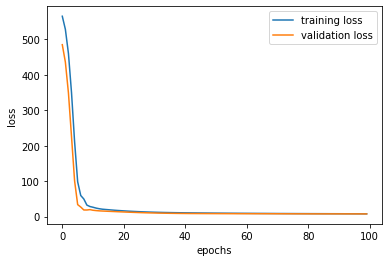

Training Done !!
test loss:7.6492
Calculating R2 Score
train r2: 0.8996432102039741
test r2: 0.899709428383422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 32)
            self.layer2 = nn.Linear(32, 16)
            self.layer3 = nn.Linear(16, 1)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            d = F.relu(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)



# Network 2:

No. of Layer = 4

Activation Function = tanh

No. of Neurons in each layer:


*   layer1(input layer) = 13
*   layer2(hidden layer) = 32
*   layer3(hidden layer) = 16    
*   layer4(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)
epoch 1 train loss: 550.8969 validation loss: 476.0755
epoch 2 train loss: 525.1418 validation loss: 449.3511
epoch 3 train loss: 492.7399 validation loss: 415.1403
epoch 4 train loss: 455.6374 validation loss: 374.8910
epoch 5 train loss: 417.4824 validation loss: 338.0098
epoch 6 train loss: 380.5428 validation loss: 306.1099
epoch 7 train loss: 345.8517 validation loss: 278.1664
epoch 8 train loss: 316.6555 validation loss: 254.3247


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 9 train loss: 292.3720 validation loss: 234.0449
epoch 10 train loss: 271.4985 validation loss: 216.3100
epoch 11 train loss: 253.0151 validation loss: 200.4851
epoch 12 train loss: 236.3894 validation loss: 186.2299
epoch 13 train loss: 221.3219 validation loss: 173.3248
epoch 14 train loss: 207.6050 validation loss: 161.6034
epoch 15 train loss: 195.0790 validation loss: 150.9256
epoch 16 train loss: 183.6121 validation loss: 141.1622
epoch 17 train loss: 173.0913 validation loss: 132.2045
epoch 18 train loss: 163.4263 validation loss: 124.0279
epoch 19 train loss: 154.5370 validation loss: 116.6186
epoch 20 train loss: 146.3502 validation loss: 109.9012
epoch 21 train loss: 138.7987 validation loss: 103.8546
epoch 22 train loss: 131.7878 validation loss: 98.4611
epoch 23 train loss: 125.2666 validation loss: 93.5568
epoch 24 train loss: 119.3117 validation loss: 88.8314
epoch 25 train loss: 113.7930 validation loss: 84.6024
epoch 26 train loss: 108.7601 validation loss: 80.636

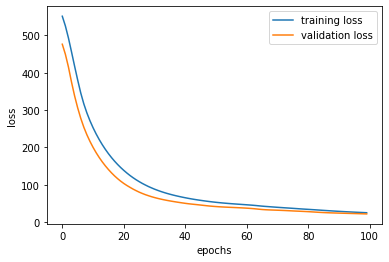

Training Done !!
test loss:28.5481
Calculating R2 Score
train r2: 0.66797347426135
test r2: 0.6256990081866851


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 32)
            self.layer2 = nn.Linear(32, 16)
            self.layer3 = nn.Linear(16, 1)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            d = F.tanh(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)







# Network 3:

No. of Layer = 3

Activation Function = relu

No. of Neurons in each layer:


*   layer1(input layer) = 13
<!-- *   layer2(hidden layer) = 32 -->
*   layer2(hidden layer) = 16    
*   layer3(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)
epoch 1 train loss: 561.0700 validation loss: 488.9381
epoch 2 train loss: 543.6548 validation loss: 471.7314
epoch 3 train loss: 524.0072 validation loss: 451.0733
epoch 4 train loss: 500.0535 validation loss: 425.7112
epoch 5 train loss: 470.9541 validation loss: 395.2876
epoch 6 train loss: 436.5996 validation loss: 360.3930
epoch 7 train loss: 397.9512 validation loss: 322.3756
epoch 8 train loss: 356.6846 validation loss: 282.8336
epoch 9 train loss: 314.6664 validation loss: 243.6292
epoch 10 train loss: 273.9327 validation loss: 206.4927
epoch 11 train loss: 236.1812 validation loss: 173.0038
epoch 12 train loss: 202.6549 validation loss: 144.0882
epoch 13 train loss: 173.7548 validation loss: 119.9430
epoch 14 train loss: 149.0823 validation loss: 100.0338
epoch 15 train loss: 127.7752 validation loss: 83.4637
epoch 16 train loss: 109.018

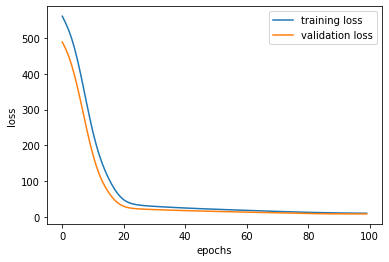

Training Done !!
test loss:9.4624
Calculating R2 Score
train r2: 0.8643929051805632
test r2: 0.8759357390344337


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 16)
            # self.layer2 = nn.Linear(32, 16)
            self.layer3 = nn.Linear(16, 1)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            # d = F.relu(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)







# Network 4:

No. of Layer = 3

Activation Function = tanh

No. of Neurons in each layer:


*   layer1(input layer) = 13
<!-- *   layer2(hidden layer) = 32 -->
*   layer2(hidden layer) = 16    
*   layer3(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
)
epoch 1 train loss: 567.7782 validation loss: 499.9875
epoch 2 train loss: 558.6419 validation loss: 492.4523
epoch 3 train loss: 549.7200 validation loss: 484.3929
epoch 4 train loss: 539.7419 validation loss: 475.3229
epoch 5 train loss: 528.2273 validation loss: 464.9753
epoch 6 train loss: 515.0203 validation loss: 453.0656
epoch 7 train loss: 500.0909 validation loss: 439.3060
epoch 8 train loss: 483.5281 validation loss: 423.6207
epoch 9 train loss: 465.5836 validation loss: 406.2224
epoch 10 train loss: 446.5785 validation loss: 387.4719
epoch 11 train loss: 426.7820 validation loss: 367.7228
epoch 12 train loss: 406.4134 validation loss: 347.2979


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 13 train loss: 385.6714 validation loss: 326.5075
epoch 14 train loss: 364.7143 validation loss: 305.6178
epoch 15 train loss: 343.6707 validation loss: 284.8656
epoch 16 train loss: 322.7098 validation loss: 264.5428
epoch 17 train loss: 302.0781 validation loss: 244.9531
epoch 18 train loss: 282.0179 validation loss: 226.2603
epoch 19 train loss: 262.7055 validation loss: 208.4917
epoch 20 train loss: 244.2717 validation loss: 191.6545
epoch 21 train loss: 226.8154 validation loss: 175.8042
epoch 22 train loss: 210.4016 validation loss: 161.0298
epoch 23 train loss: 195.0306 validation loss: 147.3877
epoch 24 train loss: 180.6151 validation loss: 134.8446
epoch 25 train loss: 167.0225 validation loss: 123.3149
epoch 26 train loss: 154.2379 validation loss: 112.8446
epoch 27 train loss: 142.4272 validation loss: 103.4805
epoch 28 train loss: 131.6709 validation loss: 95.1254
epoch 29 train loss: 121.9385 validation loss: 87.6639
epoch 30 train loss: 113.1462 validation loss: 80.

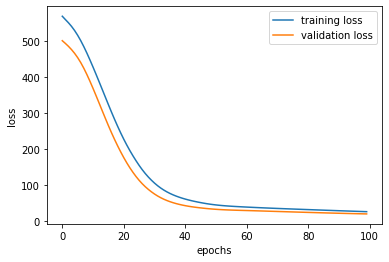

Training Done !!
test loss:27.4410
Calculating R2 Score
train r2: 0.6702110628843317
test r2: 0.6402148280856728


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 16)
            # self.layer2 = nn.Linear(32, 16)
            self.layer3 = nn.Linear(16, 1)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            # d = F.relu(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)







# Network 5:

No. of Layer = 4

Activation Function = relu

No. of Neurons in each layer:


*   layer1(input layer) = 13
*   layer2(hidden layer) = 16
*   layer3(hidden layer) = 8    
*   layer4(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
)
epoch 1 train loss: 566.9669 validation loss: 500.5476
epoch 2 train loss: 562.3053 validation loss: 496.8327
epoch 3 train loss: 557.8711 validation loss: 491.8491
epoch 4 train loss: 551.4247 validation loss: 484.4733
epoch 5 train loss: 541.1529 validation loss: 472.3717
epoch 6 train loss: 524.2954 validation loss: 453.0767
epoch 7 train loss: 497.8162 validation loss: 423.8588
epoch 8 train loss: 458.1996 validation loss: 381.4629
epoch 9 train loss: 402.2630 validation loss: 323.6063
epoch 10 train loss: 329.2190 validation loss: 251.4346
epoch 11 train loss: 243.4225 validation loss: 172.0135
epoch 12 train loss: 157.0342 validation loss: 97.9855
epoch 13 train loss: 88.4677 validation loss: 44.1641
epoch 14 train loss: 54.0267 validation loss: 22.4685
epoch 15 train loss: 46.967

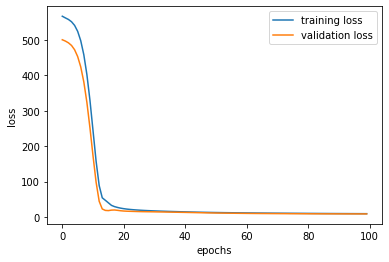

Training Done !!
test loss:7.8227
Calculating R2 Score
train r2: 0.8806396976683626
test r2: 0.8974344685050131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 16)
            self.layer2 = nn.Linear(16, 8)
            self.layer3 = nn.Linear(8, 1)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            d = F.relu(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)



# Network 6:

No. of Layer = 4

Activation Function = tanh

No. of Neurons in each layer:


*   layer1(input layer) = 13
*   layer2(hidden layer) = 16
*   layer3(hidden layer) = 8    
*   layer4(Output layer) = 1



NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
)
epoch 1 train loss: 562.9002 validation loss: 492.2769
epoch 2 train loss: 549.9978 validation loss: 480.6781
epoch 3 train loss: 535.5906 validation loss: 466.7538
epoch 4 train loss: 518.7410 validation loss: 449.2256
epoch 5 train loss: 499.5698 validation loss: 428.4100
epoch 6 train loss: 479.0164 validation loss: 406.9037
epoch 7 train loss: 457.8864 validation loss: 386.6649
epoch 8 train loss: 436.7326 validation loss: 367.9899
epoch 9 train loss: 416.7274 validation loss: 350.9182
epoch 10 train loss: 398.6789 validation loss: 335.4421


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 11 train loss: 382.5488 validation loss: 321.4228
epoch 12 train loss: 368.0063 validation loss: 308.6003
epoch 13 train loss: 354.6632 validation loss: 296.7112
epoch 14 train loss: 342.2385 validation loss: 285.5804
epoch 15 train loss: 330.5612 validation loss: 275.0900
epoch 16 train loss: 319.5168 validation loss: 265.1565
epoch 17 train loss: 309.0246 validation loss: 255.7182
epoch 18 train loss: 299.0259 validation loss: 246.7277
epoch 19 train loss: 289.4755 validation loss: 238.1471
epoch 20 train loss: 280.3375 validation loss: 229.9461
epoch 21 train loss: 271.5826 validation loss: 222.0992
epoch 22 train loss: 263.1863 validation loss: 214.5850
epoch 23 train loss: 255.1275 validation loss: 207.3845
epoch 24 train loss: 247.3878 validation loss: 200.4815
epoch 25 train loss: 239.9509 validation loss: 193.8611
epoch 26 train loss: 232.8021 validation loss: 187.5091
epoch 27 train loss: 225.9275 validation loss: 181.4122
epoch 28 train loss: 219.3143 validation loss: 1

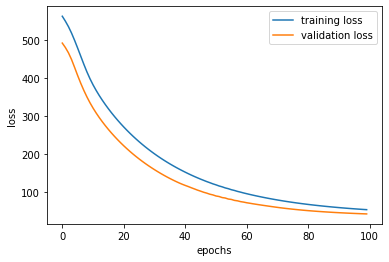

Training Done !!
test loss:64.0218
Calculating R2 Score
train r2: 0.29445590867239757
test r2: 0.16059511218858602


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X.shape[1], 16)
            self.layer2 = nn.Linear(16, 8)
            self.layer3 = nn.Linear(8, 1)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            d = F.tanh(self.layer2(d))
            d = self.layer3(d)

            return d

regression_model = NeuralNetwork()
print(regression_model)


train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


optimizer = optim.Adam(regression_model.parameters(), lr=0.005)
got_regression_model = regression_training(train_dataloader,valid_dataloader,regression_model,100,optimizer)
print("Training Done !!")

testing_loss = regression_test(test_dataloader,got_regression_model,"test")



print("Calculating R2 Score")

Y_train_pred = got_regression_model(torch.tensor(x_train, dtype=torch.float))
Y_test_pred = got_regression_model(torch.tensor(x_test, dtype=torch.float))

Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

train_r2 = r2_score(y_train,Y_train_pred)
print("train r2:",train_r2)

test_r2 = r2_score(y_test, Y_test_pred)
print("test r2:",test_r2)



#**Classification Task**

In [439]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

BreastCancer = pd.read_csv("/content/BreastCancer.csv")
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)
X1 = BreastCancer.iloc[:,2:].values
Y = BreastCancer.iloc[:,1].values
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)



X1 = np.hstack((X1,np.ones(len(X1)).reshape(len(X1),1)))
Y1 = []
for i in range(len(Y)):
  if Y[i] == 'M':
    Y1.append(0)
  elif Y[i] == 'B':
    Y1.append(1)
    
Y1 = np.array(Y1)

Y1 = torch.tensor(Y1)
Y1 = F.one_hot(Y1, num_classes=2) 
Y1 = torch.tensor(Y1, dtype=torch.float)
X1 = torch.tensor(X1, dtype=torch.float)
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid = train_test_split(X1,Y1,test_size = 0.2,shuffle = True,random_state = 42)
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.2,shuffle = True,random_state = 42)
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

torch.Size([364, 31])
torch.Size([364, 2])
torch.Size([114, 31])
torch.Size([114, 2])
torch.Size([91, 31])
torch.Size([91, 2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [440]:
BreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [441]:
BreastCancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [442]:
x_train = X_train
y_train = Y_train

x_valid = X_valid
y_valid = Y_valid

x_test = X_test
y_test = Y_test


In [443]:
def loss_acc_plot(num_epochs_array,store_train_losses,store_validation_losses,store_train_accuracies,store_validation_accuracies,num_epochs):
    
    ctr = 0
    ctr+=1
    plot3 = plt.figure(ctr)
    plt.plot(num_epochs_array,store_train_losses,label="training loss")
    plt.plot(num_epochs_array,store_validation_losses,label="validation loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()
    plt.close()

    ctr+=1
    plot4 = plt.figure(ctr)
    plt.plot(np.arange(0,num_epochs),store_train_accuracies,label="training accuracy")
    plt.plot(np.arange(0,num_epochs),store_validation_accuracies,label="validation accuracy") 
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()
    plt.close()

In [444]:
def classification_train(num_epochs,train_dataloader,valid_dataloader,model,optimizer):
    
    criterion = nn.CrossEntropyLoss()

    store_train_losses =[]
    store_train_accuracies = []
    store_validation_losses = []
    store_validation_accuracies = []

    num_total_steps = len(train_dataloader)
    

    for epoch in range(0,num_epochs):
        running_loss = 0.0
        running_correct = 0
        train_num_samples = 0

        for i,(x,lbls) in enumerate(train_dataloader):
                        
            outputs = model(x)
            loss = criterion(outputs,lbls)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            train_predictions = torch.max(outputs,1)[1]
            train_num_samples += lbls.shape[0]
            running_correct += (train_predictions == torch.max(lbls,1)[1]).sum().item()
            running_loss += loss.item()


        validation_loss,validation_accuracy = classification_test(valid_dataloader,model,purpose="valid")
        print(f'epoch: {epoch+1} / {num_epochs} train loss: {running_loss/num_total_steps:.4f} train accuracy: {(running_correct/train_num_samples)*100:.4f}% validation loss: {validation_loss.item():.4f} validation accuracy: {validation_accuracy:.4f}%')
        store_train_losses.append(running_loss/num_total_steps)
        store_train_accuracies.append((running_correct/train_num_samples)*100)

        store_validation_losses.append(validation_loss)
        store_validation_accuracies.append(validation_accuracy)

    ### plot ###

    loss_acc_plot(np.arange(0,num_epochs),store_train_losses,store_validation_losses,store_train_accuracies,store_validation_accuracies,num_epochs)


    return model,np.array(store_train_losses),np.array(store_train_accuracies)
        

def classification_test(dataloader,model,purpose="test"):
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        num_correct = 0
        num_samples = 0
        test_loss = 0
        scores = []
        test_labels = []
        store_predictions = []
        
        num_total_steps_test = len(dataloader)
        for x_t,lbls in dataloader:

            outputs = model(x_t)
            loss = criterion(outputs,lbls)


            predictions = torch.max(outputs,1)[1]
            num_samples += lbls.shape[0]
            num_correct += (predictions == torch.max(lbls,1)[1]).sum().item()
            
            if purpose == "test":
                pred_scores = outputs.cpu().numpy()
                for s in pred_scores:
                    scores.append(s)

                test_lbls = lbls.cpu().numpy()
                for tl in test_lbls:
                    test_labels.append(np.argmax(tl))
                
                for p in predictions.cpu().numpy():
                    store_predictions.append(p)

            test_loss += loss

                
                
        accuracy = (num_correct/num_samples)*100
        test_loss = test_loss/num_total_steps_test 

        if purpose == "test": 

            print(f'test loss:{test_loss:.4f} test accuracy: {accuracy}%')
            return test_loss,accuracy,scores,test_labels,store_predictions

    
    return test_loss,accuracy


# Network 1:

No. of Layer = 3

Activation Function = relu,softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:


*   layer1(input layer) = 31
*   layer2(hidden layer) = 31
*   layer3(Output layer) = 2



ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=31, bias=True)
  (layer3): Linear(in_features=31, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6046 train accuracy: 77.7473% validation loss: 0.5346 validation accuracy: 94.7368%
epoch: 2 / 5 train loss: 0.4932 train accuracy: 90.9341% validation loss: 0.4468 validation accuracy: 97.3684%
epoch: 3 / 5 train loss: 0.4321 train accuracy: 92.8571% validation loss: 0.4021 validation accuracy: 97.3684%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


epoch: 4 / 5 train loss: 0.4010 train accuracy: 94.2308% validation loss: 0.3796 validation accuracy: 97.3684%
epoch: 5 / 5 train loss: 0.3833 train accuracy: 94.7802% validation loss: 0.3668 validation accuracy: 97.3684%


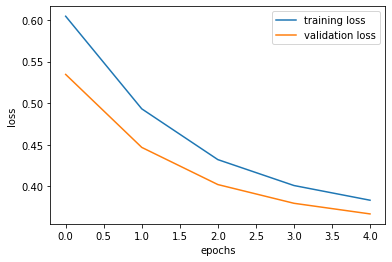

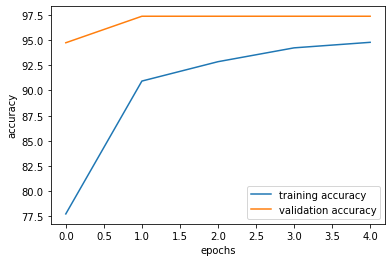

Training Done!!
test loss:0.3852 test accuracy: 95.6043956043956%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[33  3]
 [ 1 54]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [481]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 31)
            self.layer3 = nn.Linear(31, 2)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)

model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))



# Network 2:

No. of Layer = 3

Activation Function = tanh,softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:


*   layer1(input layer) = 31
*   layer2(hidden layer) = 31
*   layer3(Output layer) = 2





ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=31, bias=True)
  (layer3): Linear(in_features=31, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6181 train accuracy: 74.4505% validation loss: 0.5101 validation accuracy: 94.7368%
epoch: 2 / 5 train loss: 0.4709 train accuracy: 91.7582% validation loss: 0.4242 validation accuracy: 96.4912%
epoch: 3 / 5 train loss: 0.4173 train accuracy: 93.1319% validation loss: 0.3898 validation accuracy: 96.4912%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


epoch: 4 / 5 train loss: 0.3907 train accuracy: 95.6044% validation loss: 0.3726 validation accuracy: 97.3684%
epoch: 5 / 5 train loss: 0.3744 train accuracy: 96.9780% validation loss: 0.3626 validation accuracy: 97.3684%


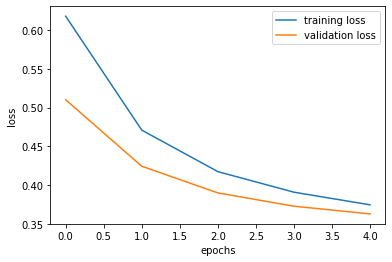

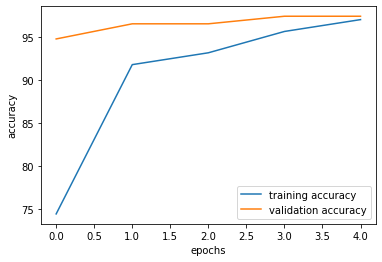

Training Done!!
test loss:0.3835 test accuracy: 95.6043956043956%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[33  3]
 [ 1 54]]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [486]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 31)
            self.layer3 = nn.Linear(31, 2)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))



# Network 3:

No. of Layer = 4

Activation Function = relu,softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:


*   layer1(input layer) = 31
*   layer2(hidden layer) = 31
*   layer3(hidden layer) = 31   
*   layer4(Output layer) = 2



ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=31, bias=True)
  (layer2): Linear(in_features=31, out_features=31, bias=True)
  (layer3): Linear(in_features=31, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6613 train accuracy: 79.3956% validation loss: 0.6151 validation accuracy: 95.6140%
epoch: 2 / 5 train loss: 0.5578 train accuracy: 94.7802% validation loss: 0.4794 validation accuracy: 95.6140%
epoch: 3 / 5 train loss: 0.4347 train accuracy: 95.3297% validation loss: 0.3836 validation accuracy: 96.4912%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


epoch: 4 / 5 train loss: 0.3773 train accuracy: 96.4286% validation loss: 0.3556 validation accuracy: 97.3684%
epoch: 5 / 5 train loss: 0.3549 train accuracy: 97.8022% validation loss: 0.3468 validation accuracy: 97.3684%


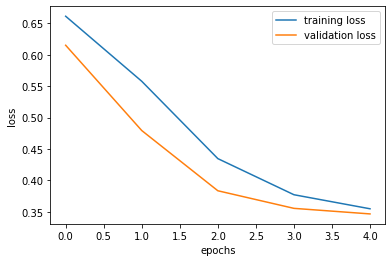

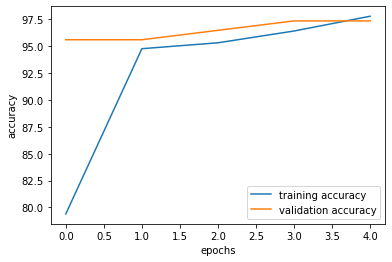

Training Done!!
test loss:0.3639 test accuracy: 95.6043956043956%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[33  3]
 [ 1 54]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [489]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 31)
            self.layer2 = nn.Linear(31, 31)
            self.layer3 = nn.Linear(31, 2)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            d = F.relu(self.layer2(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))



# Network 4:

No. of Layer = 4

Activation Function = tanh, softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:



*   layer1(input layer) = 31
*   layer2(hidden layer) = 31
*   layer3(hidden layer) = 31   
*   layer4(Output layer) = 2



ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=31, bias=True)
  (layer2): Linear(in_features=31, out_features=31, bias=True)
  (layer3): Linear(in_features=31, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6304 train accuracy: 73.9011% validation loss: 0.5299 validation accuracy: 92.9825%
epoch: 2 / 5 train loss: 0.4764 train accuracy: 91.2088% validation loss: 0.4100 validation accuracy: 95.6140%
epoch: 3 / 5 train loss: 0.4017 train accuracy: 93.9560% validation loss: 0.3660 validation accuracy: 97.3684%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


epoch: 4 / 5 train loss: 0.3688 train accuracy: 96.1538% validation loss: 0.3507 validation accuracy: 98.2456%
epoch: 5 / 5 train loss: 0.3521 train accuracy: 97.5275% validation loss: 0.3444 validation accuracy: 98.2456%


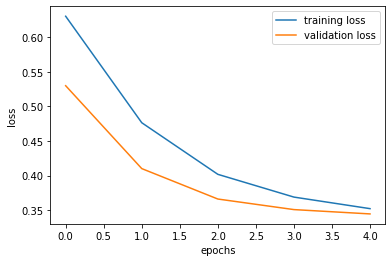

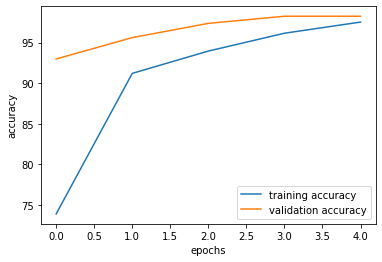

Training Done!!
test loss:0.3618 test accuracy: 96.7032967032967%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[34  2]
 [ 1 54]]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [491]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 31)
            self.layer2 = nn.Linear(31,31)
            self.layer3 = nn.Linear(31, 2)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            d = F.tanh(self.layer2(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))



# Network 5:

No. of Layer = 3

Activation Function = relu, softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:


*   layer1(input layer) = 31
<!-- *   layer2(hidden layer) = 15 -->
*   layer3(hidden layer) = 10   
*   layer4(Output layer) = 2



ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6098 train accuracy: 81.0440% validation loss: 0.5812 validation accuracy: 83.3333%
epoch: 2 / 5 train loss: 0.5449 train accuracy: 89.5604% validation loss: 0.5136 validation accuracy: 92.9825%
epoch: 3 / 5 train loss: 0.4861 train accuracy: 92.0330% validation loss: 0.4588 validation accuracy: 94.7368%
epoch: 4 / 5 train loss: 0.4439 train accuracy: 93.4066% validation loss: 0.4224 validation accuracy: 95.6140%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


epoch: 5 / 5 train loss: 0.4166 train accuracy: 93.9560% validation loss: 0.3990 validation accuracy: 96.4912%


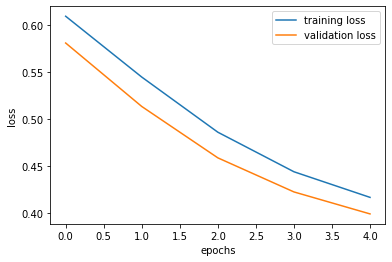

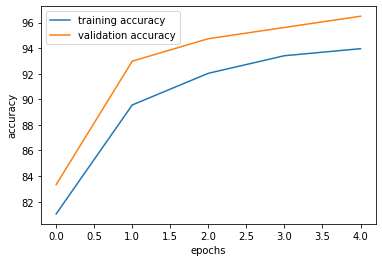

Training Done!!
test loss:0.4147 test accuracy: 94.5054945054945%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[32  4]
 [ 1 54]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


In [494]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 10)
            self.layer3 = nn.Linear(10, 2)

        def forward(self, d):
            d = F.relu(self.layer1(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))



# Network 6:

No. of Layer = 3

Activation Function = tanh, softmax(using categorical cross entropy for 2 class)

No. of Neurons in each layer:


*   layer1(input layer) = 31
<!-- *   layer2(hidden layer) = 15 -->
*   layer3(hidden layer) = 10   
*   layer4(Output layer) = 2



ClassifierNeuralNetwork(
  (layer1): Linear(in_features=31, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=2, bias=True)
)
epoch: 1 / 5 train loss: 0.6501 train accuracy: 68.9560% validation loss: 0.5924 validation accuracy: 81.5789%
epoch: 2 / 5 train loss: 0.5545 train accuracy: 87.6374% validation loss: 0.5101 validation accuracy: 91.2281%
epoch: 3 / 5 train loss: 0.4906 train accuracy: 89.8352% validation loss: 0.4559 validation accuracy: 93.8596%
epoch: 4 / 5 train loss: 0.4500 train accuracy: 91.4835% validation loss: 0.4216 validation accuracy: 96.4912%


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


epoch: 5 / 5 train loss: 0.4232 train accuracy: 92.5824% validation loss: 0.3996 validation accuracy: 96.4912%


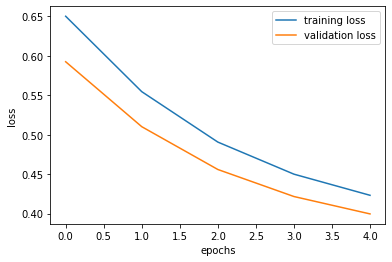

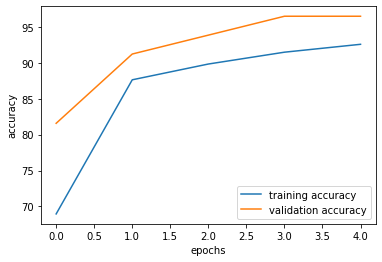

Training Done!!
test loss:0.4242 test accuracy: 93.4065934065934%
Testing Done!!

Confusion Matrix

confusion_matrix:
 [[32  4]
 [ 2 53]]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [496]:
class ClassifierNeuralNetwork(nn.Module):
        def __init__(self):
            super(ClassifierNeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X1.shape[1], 10)
            # self.layer2 = nn.Linear(15, 15)
            self.layer3 = nn.Linear(10, 2)

        def forward(self, d):
            d = F.tanh(self.layer1(d))
            # d = F.tanh(self.layer2(d))
            d = F.softmax(self.layer3(d))

            return d

classification_model = ClassifierNeuralNetwork()
print(classification_model)

optimizer = optim.Adam(classification_model.parameters(), lr=0.001)

train_datasets = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=16)

valid_datasets = torch.utils.data.TensorDataset(x_valid, y_valid)
valid_dataloader = torch.utils.data.DataLoader(valid_datasets)

test_datasets = torch.utils.data.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_datasets)


model,store_train_losses,store_train_accuracies = classification_train(5,train_dataloader,valid_dataloader,classification_model,optimizer)
print("Training Done!!")

loss,accuracy,scores,test_labels,store_predictions = classification_test(test_dataloader,model)
print("Testing Done!!")

print("\nConfusion Matrix\n")
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = np.array(test_labels), y_pred = (store_predictions)))

